<a href="https://colab.research.google.com/github/saraqkr/buy_now_or_buy_the_dip/blob/master/buy_now_buy_the_dip_JiannaPark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#**Should I Buy The Dip?**

##A Study on Behavioral Economics

###Why I Chose This Topic

I was looking at a stock graph and, without much understanding of investing, said that in order to make the most profit, I would buy the stock when it hits the lowest price before getting back up. The lower I buy, the more difference in profit I make at the end, right? But I had made an error--in hindsight, it seems obvious when is the most optimal time to buy. But in real time, how does one know if the price is going up or down (since it fluctuates all the time)? Waiting to buy the dip utilizes hindsight bias because it is based on the assumption that a drop will happen and if it happens, it will be lower than the current price. This made me curious to see how taking different approaches to investing would yield different results (profits). 

###What is Buy The Dips?
Buy the dips refers to purchasing an asset after it has declined in price. (Read more [here](https://www.investopedia.com/terms/b/buy-the-dips.asp).)


###What is Hindsight Bias?

Hindsight bias is a psychological phenomenon in which individuals tend to overestimate their own ability to have predicted an outcome that they would have been unable to predict before an event took place. Hindsight bias can lead an individual to believe that an event was more predictable than it actually was, and can result in an oversimplification in cause and effect. Hindsight bias is studied in behavioral economics. (Read more [here](https://www.investopedia.com/terms/h/hindsight-bias.asp).)


###Warren Buffett's Advice on Index Fund:

>"In the 20th Century, the Dow Jones Industrials index advanced from 66 to 11,497, paying a rising stream of dividends to boot. The 21st Century will witness further gains, almost certain to be substantial. The goal of the non-professional should not be to pick winners – neither he nor his “helpers” can do that – but should rather be to own a cross-section of businesses that in aggregate are bound to do well. A low-cost S&P 500 index fund will achieve this goal."

To learn more about index fund, see [here](https://lifestyletrading101.com/warren-buffetts-best-investment-advice-buy-index-funds/).

##Why Vanguard?

>"Vangard has historically had the lowest cost in the industry. How low? We’re talking about an expense ratio of .05% 
while the average passive index fund expense ratio is closer to 0.25% according to Investopedia. Mutual funds in general (outside of passive index funds) have expense ratios of around 1.25%, on average." (Read more [here](http://lifestyletrading101.com/warren-buffetts-best-investment-advice-buy-index-funds/).)


I’m using Vanguard 500 Index Fund ETF (VOO) because this is the type of investment I would choose in real life. Diversified (and therefore safer), less broker frees, less room for
human errors such as trading based on emotions or herd mentality.
Since I want to see the result of buying-the-dip behavior across the overall market, this index fund will be a more efficient option
to see the average of performances across 500 stocks as compared to running the scenarios in 500 different stock timeseries.


###VOO Product Summary:

- Invests in stocks in the S&P 500 Index, representing 500 of the largest U.S. companies.

- Goal is to closely track the index’s return, which is considered a gauge of overall U.S. stock returns.

- Offers high potential for investment growth; share value rises and falls more sharply than that of funds holding bonds.

- More appropriate for long-term goals where your money’s growth is essential. (Read more [here](https://investor.vanguard.com/etf/profile/VOO).)


##Method
Using (dividend-adjusted) closing prices in Vanguard S&P 500 ETF (VOO) time series from the past ten years, I will run three scenarios and compare their resultant gains:

1. "Buy now": Buy on each date. Sell on the final day of the time series. Calculate the lump sum profit and return rate.

2. "Buy the dip": Find the first drop that is 2% (1%, or 5%) lower than the average closing price of the previous month (20 trading days). Set that day as the starting/buying point. Don't buy on any other dates. Sell on the final day of the time series. Calculate the profit and return rate.

3. (Optional) Set an interest rate (2%). Put the original asset in a savings account, without investing. Calculate the profit and return rate.

I hear that on average, the option of buying now is generally more profitable, if counter-intuitive. I’ll be seeing if it’s true and if so, under which conditions.

(Inherent bias in this study: it only contains data from years 2010 onward, therefore not taking into consideration the dot.com crash and housing bubble crisis.)

In [328]:
voo_orig = pd.read_csv('drive/My Drive/PYTH122_JiannaPark/close_px.csv')
voo = voo_orig.copy()
voo

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,VOO,2010-09-10,50.890,50.930,50.6480,50.84,17276,83.936003,84.001977,83.536857,83.853535,8638,0.0,1.0
1,VOO,2010-09-13,51.530,51.570,51.2500,51.48,67505,84.991594,85.057568,84.529773,84.909126,33752,0.0,1.0
2,VOO,2010-09-14,51.519,51.740,51.1900,51.42,118840,84.973451,85.337960,84.430811,84.810164,59420,0.0,1.0
3,VOO,2010-09-15,51.650,51.690,51.2000,51.31,18566,85.189517,85.255492,84.447305,84.628734,9283,0.0,1.0
4,VOO,2010-09-16,51.630,51.660,51.3500,51.51,119161,85.156530,85.206011,84.694709,84.958607,59580,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,VOO,2020-01-27,297.230,298.730,296.4500,296.80,4272055,297.230000,298.730000,296.450000,296.800000,4272055,0.0,1.0
2360,VOO,2020-01-28,300.450,301.220,298.2201,298.70,3457290,300.450000,301.220000,298.220100,298.700000,3457290,0.0,1.0
2361,VOO,2020-01-29,300.150,301.935,299.9220,301.78,2736055,300.150000,301.935000,299.922000,301.780000,2736055,0.0,1.0
2362,VOO,2020-01-30,301.090,301.290,297.3000,298.04,4406905,301.090000,301.290000,297.300000,298.040000,4406905,0.0,1.0


Drop all columns except for 'date' and 'adjClose' from the original dataframe. 

In [329]:
voo.drop(columns=['symbol', 'close', 'high', 'low', 'open', 'volume', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'], inplace=True)
voo

,date,adjClose
0,2010-09-10,83.936003
1,2010-09-13,84.991594
2,2010-09-14,84.973451
3,2010-09-15,85.189517
4,2010-09-16,85.156530
...,...,...
2359,2020-01-27,297.230000
2360,2020-01-28,300.450000
2361,2020-01-29,300.150000
2362,2020-01-30,301.090000


Turn the dataframe into a graph.

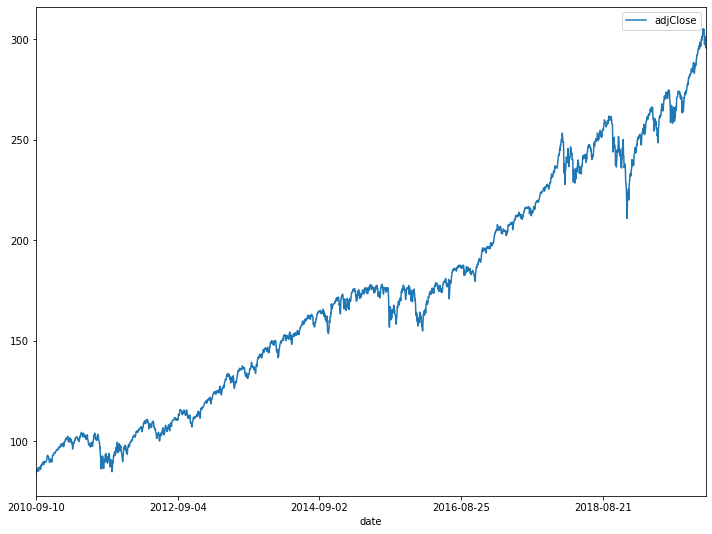

In [330]:
voo.plot(x='date', y='adjClose', figsize=(12,9))

Looking at this graph, when do you think is the best time to buy? 

In this study, my goal is to check which approach to investing is generally more profitable: "buy now" vs. "buy the dip".

####How Much Should I Invest?

"As a general rule of thumb, it is reasonable to put 20% of your income in investments." (From [here](https://www.quora.com/How-many-shares-of-the-VOO-Vanguard-S-P-500-ETF-should-I-buy-at-a-time).)

Let's start with the assumption that I make \$50,000 USD a year (I don't, mweee). I'll start with $10,000 of starting asset.

## Scenario 1: Buy Now

First calculate how many shares I can buy each day with the orig_asset.

In [331]:
orig_asset = 10000.00

voo['share'] = voo['adjClose'].map(lambda x: orig_asset // x)
voo

,date,adjClose,share
0,2010-09-10,83.936003,119.0
1,2010-09-13,84.991594,117.0
2,2010-09-14,84.973451,117.0
3,2010-09-15,85.189517,117.0
4,2010-09-16,85.156530,117.0
...,...,...,...
2359,2020-01-27,297.230000,33.0
2360,2020-01-28,300.450000,33.0
2361,2020-01-29,300.150000,33.0
2362,2020-01-30,301.090000,33.0


Calculate beginning share number times the beginning closing price. 

In [0]:
voo['ls_buy'] = voo['share'] * voo['adjClose'] 

Calculate beginning share number times the final closing price. voo.iloc[-1] shows the final closing price is 295.69, on 2020-01-31.


In [0]:
voo['ls_sell'] = voo['share'] * voo.iloc[-1]['adjClose']

The difference between the buying price and the selling price is the lump sum profit I'll make if I "buy now" on each day and sell on January 31, 2020.

In [0]:
voo['ls_profit'] = voo['ls_sell'] - voo['ls_buy']

Create a new column to indicate the rate at which the original asset generated profit.

In [0]:
voo['ls_return'] = voo['ls_profit'] / orig_asset

In [336]:
voo

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return
0,2010-09-10,83.936003,119.0,9988.384314,35187.11,25198.725686,2.519873
1,2010-09-13,84.991594,117.0,9944.016492,34595.73,24651.713508,2.465171
2,2010-09-14,84.973451,117.0,9941.893764,34595.73,24653.836236,2.465384
3,2010-09-15,85.189517,117.0,9967.173526,34595.73,24628.556474,2.462856
4,2010-09-16,85.156530,117.0,9963.314021,34595.73,24632.415979,2.463242
...,...,...,...,...,...,...,...
2359,2020-01-27,297.230000,33.0,9808.590000,9757.77,-50.820000,-0.005082
2360,2020-01-28,300.450000,33.0,9914.850000,9757.77,-157.080000,-0.015708
2361,2020-01-29,300.150000,33.0,9904.950000,9757.77,-147.180000,-0.014718
2362,2020-01-30,301.090000,33.0,9935.970000,9757.77,-178.200000,-0.017820


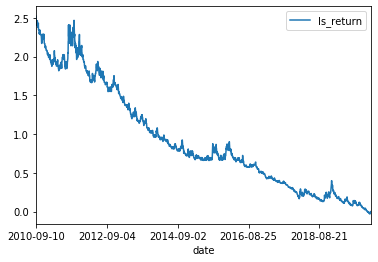

In [337]:
voo.plot(x='date', y='ls_return')
# Show an example here

The downward graph above makes sense, because since the overall market grew, the earlier I bought, the cheaper each stock was, so I bought more shares, and when each share's value rose, my overall profit grew too.

## Scenario 2: Buy The Dip

Let's define dip as when the price is 2% lower than the average closing price of the last 20 data.

Using rolling method, first calculate the moving average of the closing prices of the 20 previous data (then the first 19 data will yield NaN).

(Learn about rolling method [here](https://www.youtube.com/watch?v=T2mQiesnx8s).)



In [338]:
voo['MA20'] = voo['adjClose'].rolling(20).mean()
voo

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20
0,2010-09-10,83.936003,119.0,9988.384314,35187.11,25198.725686,2.519873,NaN
1,2010-09-13,84.991594,117.0,9944.016492,34595.73,24651.713508,2.465171,NaN
2,2010-09-14,84.973451,117.0,9941.893764,34595.73,24653.836236,2.465384,NaN
3,2010-09-15,85.189517,117.0,9967.173526,34595.73,24628.556474,2.462856,NaN
4,2010-09-16,85.156530,117.0,9963.314021,34595.73,24632.415979,2.463242,NaN
...,...,...,...,...,...,...,...,...
2359,2020-01-27,297.230000,33.0,9808.590000,9757.77,-50.820000,-0.005082,299.9590
2360,2020-01-28,300.450000,33.0,9914.850000,9757.77,-157.080000,-0.015708,300.1480
2361,2020-01-29,300.150000,33.0,9904.950000,9757.77,-147.180000,-0.014718,300.4035
2362,2020-01-30,301.090000,33.0,9935.970000,9757.77,-178.200000,-0.017820,300.6680


Drop rows where 'MA20' is NaN, to prevent skewing the result.

In [339]:
voo = voo[~voo.MA20.isna()].copy()
voo.reset_index(drop=True, inplace=True)
voo

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20
0,2010-10-07,87.781930,113.0,9919.358117,33412.97,23493.611883,2.349361,86.186649
1,2010-10-08,88.445020,113.0,9994.287306,33412.97,23418.682694,2.341868,86.412099
2,2010-10-11,88.295954,113.0,9977.442760,33412.97,23435.527240,2.343553,86.577317
3,2010-10-12,88.809977,112.0,9946.717426,33117.28,23170.562574,2.317056,86.769144
4,2010-10-13,89.340582,111.0,9916.804581,32821.59,22904.785419,2.290479,86.976697
...,...,...,...,...,...,...,...,...
2340,2020-01-27,297.230000,33.0,9808.590000,9757.77,-50.820000,-0.005082,299.959000
2341,2020-01-28,300.450000,33.0,9914.850000,9757.77,-157.080000,-0.015708,300.148000
2342,2020-01-29,300.150000,33.0,9904.950000,9757.77,-147.180000,-0.014718,300.403500
2343,2020-01-30,301.090000,33.0,9935.970000,9757.77,-178.200000,-0.017820,300.668000


Create two copies of this dataframe for later uses, when we redefine dip (from 2% to 1% and to 5%).

In [0]:
voo_one = voo.copy()
voo_five = voo.copy()

Let's start with 2%.

Create a new column returning a boolean value of True if the closing price is 2% lower than 'MA20'.

In [341]:
def dip_buy(row):
  if row['adjClose'] < row['MA20'] * 0.98:
    return True
  else:
    return False

voo['dip2%'] = voo.apply(dip_buy, axis=1)
voo[voo['dip2%'] == True]

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20,dip2%
109,2011-03-15,98.009622,102.0,9996.981404,30160.38,20163.398596,2.016340,100.522618,True
110,2011-03-16,96.145675,104.0,9999.150178,30751.76,20752.609822,2.075261,100.264098,True
111,2011-03-17,97.344997,102.0,9929.189708,30160.38,20231.190292,2.023119,100.033395,True
112,2011-03-18,97.761429,102.0,9971.665708,30160.38,20188.714292,2.018871,99.804358,True
165,2011-06-03,99.804114,100.0,9980.411352,29569.00,19588.588648,1.958859,102.119720,True
...,...,...,...,...,...,...,...,...,...
2228,2019-08-15,258.895479,38.0,9838.028220,11236.22,1398.191780,0.139819,267.392112,True
2234,2019-08-23,259.073762,38.0,9844.802944,11236.22,1391.417056,0.139142,264.771859,True
2261,2019-10-02,263.295271,37.0,9741.925036,10940.53,1198.604964,0.119860,271.588332,True
2262,2019-10-03,265.385153,37.0,9819.250668,10940.53,1121.279332,0.112128,271.311113,True


The above dataframe shows that dip of 2% happens 231 times in this time series.

It also shows that I will be waiting at least 109 (128 minus the first 19 rows where 'MA20' is NaN) trading days until I buy the dip for the first time.

To keep track of the dates when dips happen, create a new column 'dip_date' that is equal to 'date' when 'dip2%'==True. Then backfill NaN values.

In [342]:
def dip_date(row):
  if row['dip2%'] == True:
    return row['date']
  else:
    return None

voo['dip_date'] = voo.apply(dip_date, axis=1)
voo['dip_date'].fillna(method='backfill', inplace=True)

voo

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20,dip2%,dip_date
0,2010-10-07,87.781930,113.0,9919.358117,33412.97,23493.611883,2.349361,86.186649,False,2011-03-15
1,2010-10-08,88.445020,113.0,9994.287306,33412.97,23418.682694,2.341868,86.412099,False,2011-03-15
2,2010-10-11,88.295954,113.0,9977.442760,33412.97,23435.527240,2.343553,86.577317,False,2011-03-15
3,2010-10-12,88.809977,112.0,9946.717426,33117.28,23170.562574,2.317056,86.769144,False,2011-03-15
4,2010-10-13,89.340582,111.0,9916.804581,32821.59,22904.785419,2.290479,86.976697,False,2011-03-15
...,...,...,...,...,...,...,...,...,...,...
2340,2020-01-27,297.230000,33.0,9808.590000,9757.77,-50.820000,-0.005082,299.959000,False,None
2341,2020-01-28,300.450000,33.0,9914.850000,9757.77,-157.080000,-0.015708,300.148000,False,None
2342,2020-01-29,300.150000,33.0,9904.950000,9757.77,-147.180000,-0.014718,300.403500,False,None
2343,2020-01-30,301.090000,33.0,9935.970000,9757.77,-178.200000,-0.017820,300.668000,False,None


Create a new column 'dip_profit' whose value is the same as 'ls_profit' when 'dip2%'==True.

Using backfill method, the NaN values of 'dip_profit' (where 'dip2%'==False) are set the same as 'ls_profit' of the next data where 'dip2%'==True.

In [343]:
def dip_two_perc(row):
  if row['dip2%'] == True:
    return row['ls_profit']
  else:
    return None

voo['dip_profit'] = voo.apply(dip_two_perc, axis=1)
voo['dip_profit'].fillna(method='backfill', inplace=True)

voo

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20,dip2%,dip_date,dip_profit
0,2010-10-07,87.781930,113.0,9919.358117,33412.97,23493.611883,2.349361,86.186649,False,2011-03-15,20163.398596
1,2010-10-08,88.445020,113.0,9994.287306,33412.97,23418.682694,2.341868,86.412099,False,2011-03-15,20163.398596
2,2010-10-11,88.295954,113.0,9977.442760,33412.97,23435.527240,2.343553,86.577317,False,2011-03-15,20163.398596
3,2010-10-12,88.809977,112.0,9946.717426,33117.28,23170.562574,2.317056,86.769144,False,2011-03-15,20163.398596
4,2010-10-13,89.340582,111.0,9916.804581,32821.59,22904.785419,2.290479,86.976697,False,2011-03-15,20163.398596
...,...,...,...,...,...,...,...,...,...,...,...
2340,2020-01-27,297.230000,33.0,9808.590000,9757.77,-50.820000,-0.005082,299.959000,False,None,NaN
2341,2020-01-28,300.450000,33.0,9914.850000,9757.77,-157.080000,-0.015708,300.148000,False,None,NaN
2342,2020-01-29,300.150000,33.0,9904.950000,9757.77,-147.180000,-0.014718,300.403500,False,None,NaN
2343,2020-01-30,301.090000,33.0,9935.970000,9757.77,-178.200000,-0.017820,300.668000,False,None,NaN


The last data where 'dip2%'==True is voo.iloc[2284]. Since there's no dip after that, the rows that follow 2284 will indicate 'dip_profit' is NaN (since nothing to backfill with). Drop those rows to prevent skewing the result.


In [344]:
voo = voo[~voo['dip_profit'].isna()].copy()
voo

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20,dip2%,dip_date,dip_profit
0,2010-10-07,87.781930,113.0,9919.358117,33412.97,23493.611883,2.349361,86.186649,False,2011-03-15,20163.398596
1,2010-10-08,88.445020,113.0,9994.287306,33412.97,23418.682694,2.341868,86.412099,False,2011-03-15,20163.398596
2,2010-10-11,88.295954,113.0,9977.442760,33412.97,23435.527240,2.343553,86.577317,False,2011-03-15,20163.398596
3,2010-10-12,88.809977,112.0,9946.717426,33117.28,23170.562574,2.317056,86.769144,False,2011-03-15,20163.398596
4,2010-10-13,89.340582,111.0,9916.804581,32821.59,22904.785419,2.290479,86.976697,False,2011-03-15,20163.398596
...,...,...,...,...,...,...,...,...,...,...,...
2261,2019-10-02,263.295271,37.0,9741.925036,10940.53,1198.604964,0.119860,271.588332,True,2019-10-02,1198.604964
2262,2019-10-03,265.385153,37.0,9819.250668,10940.53,1121.279332,0.112128,271.311113,True,2019-10-03,1121.279332
2263,2019-10-04,269.067326,37.0,9955.491068,10940.53,985.038932,0.098504,271.208099,False,2019-10-08,1181.666969
2264,2019-10-07,267.912915,37.0,9912.777862,10940.53,1027.752138,0.102775,271.043897,False,2019-10-08,1181.666969


Get 'dip_return' by comparing orig_asset & 'dip_profit' to see the rate of profit.

In [0]:
voo['dip_return'] = voo['dip_profit'] / orig_asset

Let's visualize 'ls_return' vs 'dip_return'.

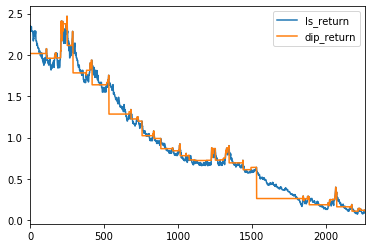

In [346]:
voo[['ls_return', 'dip_return']].plot()

During segments where 'dip_return' (orange line) drops, 'ls_return' (blue line) steadily returns higher profit.

Let's get the average of 'ls_return' and the average of 'dip_return'.

In [347]:
avg_ls_return = round(voo['ls_return'].mean(), 2)
avg_dip_return = round(voo['dip_return'].mean(), 2)

print(f'''Average return of buying now: {avg_ls_return}
Average return of waiting to buy the dip: {avg_dip_return}''')

Average return of buying now: 0.94
Average return of waiting to buy the dip: 0.92


We can get the individual return difference of buying now vs buying the dip, as well as the average of their differences.
(It's the same as avg_ls_return minus avg_dip_return.)

In [348]:
voo['ls_vs_dip_return'] = voo['ls_return'] - voo['dip_return']
avg_ls_vs_dip = round((voo['ls_vs_dip_return'].mean()),2)

print(f'''The average difference between lump sum return and buy-the-dip return: {avg_ls_vs_dip}
This shows that buying now, on average, will yield {avg_ls_vs_dip*100:.1f}% more profit than buying the dip.''')

The average difference between lump sum return and buy-the-dip return: 0.02
This shows that buying now, on average, will yield 2.0% more profit than buying the dip.


In [349]:
voo

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20,dip2%,dip_date,dip_profit,dip_return,ls_vs_dip_return
0,2010-10-07,87.781930,113.0,9919.358117,33412.97,23493.611883,2.349361,86.186649,False,2011-03-15,20163.398596,2.016340,0.333021
1,2010-10-08,88.445020,113.0,9994.287306,33412.97,23418.682694,2.341868,86.412099,False,2011-03-15,20163.398596,2.016340,0.325528
2,2010-10-11,88.295954,113.0,9977.442760,33412.97,23435.527240,2.343553,86.577317,False,2011-03-15,20163.398596,2.016340,0.327213
3,2010-10-12,88.809977,112.0,9946.717426,33117.28,23170.562574,2.317056,86.769144,False,2011-03-15,20163.398596,2.016340,0.300716
4,2010-10-13,89.340582,111.0,9916.804581,32821.59,22904.785419,2.290479,86.976697,False,2011-03-15,20163.398596,2.016340,0.274139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,2019-10-02,263.295271,37.0,9741.925036,10940.53,1198.604964,0.119860,271.588332,True,2019-10-02,1198.604964,0.119860,0.000000
2262,2019-10-03,265.385153,37.0,9819.250668,10940.53,1121.279332,0.112128,271.311113,True,2019-10-03,1121.279332,0.112128,0.000000
2263,2019-10-04,269.067326,37.0,9955.491068,10940.53,985.038932,0.098504,271.208099,False,2019-10-08,1181.666969,0.118167,-0.019663
2264,2019-10-07,267.912915,37.0,9912.777862,10940.53,1027.752138,0.102775,271.043897,False,2019-10-08,1181.666969,0.118167,-0.015391


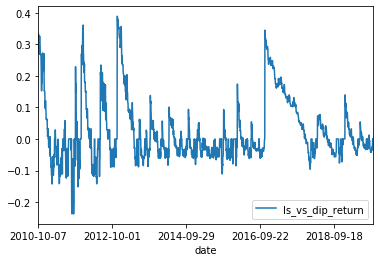

In [350]:
voo.plot(x='date', y='ls_vs_dip_return')

Let's see some examples. What is the difference if I, on a certain date, waited a few more days (until the first 'dip2%'==True) to buy instead of today?
#### Example 1

Say I purchased the stock at iloc[155], on 'date'=='2011-05-19'. When I sold at the end on 'date'=='2020-01-31', I'd have made 187% of my original asset.

But if I waited till the dip and purchased on 'dip_date'=='2011-06-03', when I sold at the end on 'date'=='2020-01-31', I'd have made 196% of my original asset.

Sometimes, buying the dip works better (in this case, by 9% margin).

In [351]:
voo.iloc[155:166]

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20,dip2%,dip_date,dip_profit,dip_return,ls_vs_dip_return
155,2011-05-19,102.966390,97.0,9987.739802,28681.93,18694.190198,1.869419,103.077036,False,2011-06-03,19588.588648,1.958859,-0.089440
156,2011-05-20,102.271191,97.0,9920.305517,28681.93,18761.624483,1.876162,103.074970,False,2011-06-03,19588.588648,1.958859,-0.082696
157,2011-05-23,101.058985,98.0,9903.780532,28977.62,19073.839468,1.907384,103.017245,False,2011-06-03,19588.588648,1.958859,-0.051475
158,2011-05-24,100.975327,99.0,9996.557365,29273.31,19276.752635,1.927675,102.910707,False,2011-06-03,19588.588648,1.958859,-0.031184
159,2011-05-25,101.309959,98.0,9928.376014,28977.62,19049.243986,1.904924,102.787729,False,2011-06-03,19588.588648,1.958859,-0.053934
160,2011-05-26,101.711518,98.0,9967.728784,28977.62,19009.891216,1.900989,102.668098,False,2011-06-03,19588.588648,1.958859,-0.057870
161,2011-05-27,102.156579,97.0,9909.188192,28681.93,18772.741808,1.877274,102.555662,False,2011-06-03,19588.588648,1.958859,-0.081585
162,2011-05-31,103.183901,96.0,9905.654474,28386.24,18480.585526,1.848059,102.506304,False,2011-06-03,19588.588648,1.958859,-0.110800
163,2011-06-01,100.891669,99.0,9988.275214,29273.31,19285.034786,1.928503,102.359065,False,2011-06-03,19588.588648,1.958859,-0.030355
164,2011-06-02,100.774547,99.0,9976.680201,29273.31,19296.629799,1.929663,102.241191,False,2011-06-03,19588.588648,1.958859,-0.029196


###### Example 2

Say I purchased the stock at iloc[1600], on 'date'=='2017-02-15'. When I sold at the end on 'date'=='2020-01-31', I'd have made 45% of my original asset.

But if I waited till the dip and purchased on 'dip_date'=='2018-02-05', when I sold at the end on 'date'=='2020-01-31', I'd have made 26% of my original asset.

Sometimes, buying now works better (in this case, by 19% margin).

In [352]:
voo.iloc[1600:1610]

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20,dip2%,dip_date,dip_profit,dip_return,ls_vs_dip_return
1600,2017-02-15,203.430054,49.0,9968.072645,14488.81,4520.737355,0.452074,198.526812,False,2018-02-05,2615.906036,0.261591,0.190483
1601,2017-02-16,203.269709,49.0,9960.215763,14488.81,4528.594237,0.452859,198.906452,False,2018-02-05,2615.906036,0.261591,0.191269
1602,2017-02-17,203.580966,49.0,9975.467357,14488.81,4513.342643,0.451334,199.270057,False,2018-02-05,2615.906036,0.261591,0.189744
1603,2017-02-21,204.778834,48.0,9829.384055,14193.12,4363.735945,0.436374,199.716192,False,2018-02-05,2615.906036,0.261591,0.174783
1604,2017-02-22,204.684514,48.0,9824.856679,14193.12,4368.263321,0.436826,200.095359,False,2018-02-05,2615.906036,0.261591,0.175236
1605,2017-02-23,204.797699,48.0,9830.289530,14193.12,4362.830470,0.436283,200.398127,False,2018-02-05,2615.906036,0.261591,0.174692
1606,2017-02-24,205.042931,48.0,9842.060705,14193.12,4351.059295,0.435106,200.720703,False,2018-02-05,2615.906036,0.261591,0.173515
1607,2017-02-27,205.344756,48.0,9856.548305,14193.12,4336.571695,0.433657,201.072518,False,2018-02-05,2615.906036,0.261591,0.172067
1608,2017-02-28,204.741106,48.0,9827.573105,14193.12,4365.546895,0.436555,201.454043,False,2018-02-05,2615.906036,0.261591,0.174964
1609,2017-03-01,207.646172,48.0,9967.016257,14193.12,4226.103743,0.422610,201.981294,False,2018-02-05,2615.906036,0.261591,0.161020


### Repeat the above scenario with a different parameter: When the dip is 1%...

Okay, what if we define "dip" as 1% lower than the average closing price of the previous 20 rows, instead of 2%?

Remember 'voo_one' copy I had saved earlier for this use?

Create a new column showing boolean values if the closing price is 1% lower than MA20.



In [353]:
def dip_buy(row):
  if row['adjClose'] < row['MA20'] * 0.99:
    return True
  else:
    return False

voo_one['dip1%'] = voo_one.apply(dip_buy, axis=1)
voo_one

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20,dip1%
0,2010-10-07,87.781930,113.0,9919.358117,33412.97,23493.611883,2.349361,86.186649,False
1,2010-10-08,88.445020,113.0,9994.287306,33412.97,23418.682694,2.341868,86.412099,False
2,2010-10-11,88.295954,113.0,9977.442760,33412.97,23435.527240,2.343553,86.577317,False
3,2010-10-12,88.809977,112.0,9946.717426,33117.28,23170.562574,2.317056,86.769144,False
4,2010-10-13,89.340582,111.0,9916.804581,32821.59,22904.785419,2.290479,86.976697,False
...,...,...,...,...,...,...,...,...,...
2340,2020-01-27,297.230000,33.0,9808.590000,9757.77,-50.820000,-0.005082,299.959000,False
2341,2020-01-28,300.450000,33.0,9914.850000,9757.77,-157.080000,-0.015708,300.148000,False
2342,2020-01-29,300.150000,33.0,9904.950000,9757.77,-147.180000,-0.014718,300.403500,False
2343,2020-01-30,301.090000,33.0,9935.970000,9757.77,-178.200000,-0.017820,300.668000,False


Like before, to keep track of the dates when dips happen, create a new column 'dip_date' that is equal to 'date' when 'dip1%'==True. Then backfill NaN values.

In [354]:
def dip_date(row):
  if row['dip1%'] == True:
    return row['date']
  else:
    return None

voo_one['dip_date'] = voo_one.apply(dip_date, axis=1)
voo_one['dip_date'].fillna(method='backfill', inplace=True)

voo_one

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20,dip1%,dip_date
0,2010-10-07,87.781930,113.0,9919.358117,33412.97,23493.611883,2.349361,86.186649,False,2010-11-16
1,2010-10-08,88.445020,113.0,9994.287306,33412.97,23418.682694,2.341868,86.412099,False,2010-11-16
2,2010-10-11,88.295954,113.0,9977.442760,33412.97,23435.527240,2.343553,86.577317,False,2010-11-16
3,2010-10-12,88.809977,112.0,9946.717426,33117.28,23170.562574,2.317056,86.769144,False,2010-11-16
4,2010-10-13,89.340582,111.0,9916.804581,32821.59,22904.785419,2.290479,86.976697,False,2010-11-16
...,...,...,...,...,...,...,...,...,...,...
2340,2020-01-27,297.230000,33.0,9808.590000,9757.77,-50.820000,-0.005082,299.959000,False,2020-01-31
2341,2020-01-28,300.450000,33.0,9914.850000,9757.77,-157.080000,-0.015708,300.148000,False,2020-01-31
2342,2020-01-29,300.150000,33.0,9904.950000,9757.77,-147.180000,-0.014718,300.403500,False,2020-01-31
2343,2020-01-30,301.090000,33.0,9935.970000,9757.77,-178.200000,-0.017820,300.668000,False,2020-01-31


Create a new column 'dip_profit' whose value is the same as 'ls_profit' when 'dip1%'==True.

Using backfill method, the NaN values of 'dip_profit' (where 'dip1%'==False) are set the same as 'ls_profit' of the next data where 'dip1%'==True.

In [355]:
def dip_one_perc(row):
  if row['dip1%'] == True:
    return row['ls_profit']
  else:
    return None

voo_one['dip_profit'] = voo_one.apply(dip_one_perc, axis=1)
voo_one['dip_profit'].fillna(method='backfill', inplace=True)

voo_one

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20,dip1%,dip_date,dip_profit
0,2010-10-07,87.781930,113.0,9919.358117,33412.97,23493.611883,2.349361,86.186649,False,2010-11-16,22886.380065
1,2010-10-08,88.445020,113.0,9994.287306,33412.97,23418.682694,2.341868,86.412099,False,2010-11-16,22886.380065
2,2010-10-11,88.295954,113.0,9977.442760,33412.97,23435.527240,2.343553,86.577317,False,2010-11-16,22886.380065
3,2010-10-12,88.809977,112.0,9946.717426,33117.28,23170.562574,2.317056,86.769144,False,2010-11-16,22886.380065
4,2010-10-13,89.340582,111.0,9916.804581,32821.59,22904.785419,2.290479,86.976697,False,2010-11-16,22886.380065
...,...,...,...,...,...,...,...,...,...,...,...
2340,2020-01-27,297.230000,33.0,9808.590000,9757.77,-50.820000,-0.005082,299.959000,False,2020-01-31,0.000000
2341,2020-01-28,300.450000,33.0,9914.850000,9757.77,-157.080000,-0.015708,300.148000,False,2020-01-31,0.000000
2342,2020-01-29,300.150000,33.0,9904.950000,9757.77,-147.180000,-0.014718,300.403500,False,2020-01-31,0.000000
2343,2020-01-30,301.090000,33.0,9935.970000,9757.77,-178.200000,-0.017820,300.668000,False,2020-01-31,0.000000


In this case, the last data where 'dip1%'==True is the last row of the dataframe. There's no row where 'dip_profit' is NaN after, so no need to drop anything.

(There are rows with 'dip_profit'==0.000000. Should I drop them too? No. It just means that I'm not buying anything, because there was no upcoming dip within the time series.)

Create a new column, 'dip_return' by comparing orig_asset & 'dip_profit' to see the rate of profit.

In [0]:
voo_one['dip_return'] = voo_one['dip_profit'] / orig_asset

Get the average of 'ls_return' and the average of 'dip_return'.

In [357]:
avg_ls_return = round(voo_one['ls_return'].mean(), 2)
avg_dip_return = round(voo_one['dip_return'].mean(), 2)

print(f'''Average return of buying now: {avg_ls_return}
Average return when waiting to buy the dip: {avg_dip_return}''')

Average return of buying now: 0.91
Average return when waiting to buy the dip: 0.91


Okay, when dip is only 1% less than the average closing price of the past month, in this 10-year time series, there's no difference in buying now versus buying the dip.

### Repeat the above with a different parameter: When the dip is 5%...

Now we define "dip" as 5% lower than the average closing price of the previous 20 rows, instead of 2% or 1%.

Remember voo_five copy I had saved earlier for this use?

Create a new column showing boolean values if the closing price is 5% lower than MA20.



In [358]:
def dip_buy(row):
  if row['adjClose'] < row['MA20'] * 0.95:
    return True
  else:
    return False

voo_five['dip5%'] = voo_five.apply(dip_buy, axis=1)
voo_five

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20,dip5%
0,2010-10-07,87.781930,113.0,9919.358117,33412.97,23493.611883,2.349361,86.186649,False
1,2010-10-08,88.445020,113.0,9994.287306,33412.97,23418.682694,2.341868,86.412099,False
2,2010-10-11,88.295954,113.0,9977.442760,33412.97,23435.527240,2.343553,86.577317,False
3,2010-10-12,88.809977,112.0,9946.717426,33117.28,23170.562574,2.317056,86.769144,False
4,2010-10-13,89.340582,111.0,9916.804581,32821.59,22904.785419,2.290479,86.976697,False
...,...,...,...,...,...,...,...,...,...
2340,2020-01-27,297.230000,33.0,9808.590000,9757.77,-50.820000,-0.005082,299.959000,False
2341,2020-01-28,300.450000,33.0,9914.850000,9757.77,-157.080000,-0.015708,300.148000,False
2342,2020-01-29,300.150000,33.0,9904.950000,9757.77,-147.180000,-0.014718,300.403500,False
2343,2020-01-30,301.090000,33.0,9935.970000,9757.77,-178.200000,-0.017820,300.668000,False


Like before, to keep track of the dates when dips happen, create a new column 'dip_date' that is equal to 'date' when 'dip5%'==True. Then backfill NaN values.

In [359]:
def dip_date(row):
  if row['dip5%'] == True:
    return row['date']
  else:
    return None

voo_five['dip_date'] = voo_five.apply(dip_date, axis=1)
voo_five['dip_date'].fillna(method='backfill', inplace=True)

voo_five

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20,dip5%,dip_date
0,2010-10-07,87.781930,113.0,9919.358117,33412.97,23493.611883,2.349361,86.186649,False,2011-08-04
1,2010-10-08,88.445020,113.0,9994.287306,33412.97,23418.682694,2.341868,86.412099,False,2011-08-04
2,2010-10-11,88.295954,113.0,9977.442760,33412.97,23435.527240,2.343553,86.577317,False,2011-08-04
3,2010-10-12,88.809977,112.0,9946.717426,33117.28,23170.562574,2.317056,86.769144,False,2011-08-04
4,2010-10-13,89.340582,111.0,9916.804581,32821.59,22904.785419,2.290479,86.976697,False,2011-08-04
...,...,...,...,...,...,...,...,...,...,...
2340,2020-01-27,297.230000,33.0,9808.590000,9757.77,-50.820000,-0.005082,299.959000,False,None
2341,2020-01-28,300.450000,33.0,9914.850000,9757.77,-157.080000,-0.015708,300.148000,False,None
2342,2020-01-29,300.150000,33.0,9904.950000,9757.77,-147.180000,-0.014718,300.403500,False,None
2343,2020-01-30,301.090000,33.0,9935.970000,9757.77,-178.200000,-0.017820,300.668000,False,None


Create a new column 'dip_profit' whose value is the same as 'ls_profit' when 'dip5%'==True.

Using backfill method, the NaN values of 'dip_profit' (where 'dip5%'==False) are set the same as 'ls_profit' of the next data where 'dip5%'==True.

In [360]:
def dip_three_perc(row):
  if row['dip5%'] == True:
    return row['ls_profit']
  else:
    return None

voo_five['dip_profit'] = voo_five.apply(dip_three_perc, axis=1)
voo_five['dip_profit'].fillna(method='backfill', inplace=True)

voo_five

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20,dip5%,dip_date,dip_profit
0,2010-10-07,87.781930,113.0,9919.358117,33412.97,23493.611883,2.349361,86.186649,False,2011-08-04,21945.285667
1,2010-10-08,88.445020,113.0,9994.287306,33412.97,23418.682694,2.341868,86.412099,False,2011-08-04,21945.285667
2,2010-10-11,88.295954,113.0,9977.442760,33412.97,23435.527240,2.343553,86.577317,False,2011-08-04,21945.285667
3,2010-10-12,88.809977,112.0,9946.717426,33117.28,23170.562574,2.317056,86.769144,False,2011-08-04,21945.285667
4,2010-10-13,89.340582,111.0,9916.804581,32821.59,22904.785419,2.290479,86.976697,False,2011-08-04,21945.285667
...,...,...,...,...,...,...,...,...,...,...,...
2340,2020-01-27,297.230000,33.0,9808.590000,9757.77,-50.820000,-0.005082,299.959000,False,None,NaN
2341,2020-01-28,300.450000,33.0,9914.850000,9757.77,-157.080000,-0.015708,300.148000,False,None,NaN
2342,2020-01-29,300.150000,33.0,9904.950000,9757.77,-147.180000,-0.014718,300.403500,False,None,NaN
2343,2020-01-30,301.090000,33.0,9935.970000,9757.77,-178.200000,-0.017820,300.668000,False,None,NaN


Drop rows where 'dip_profit' is NaN.

In [361]:
voo_five = voo_five[~voo_five['dip_profit'].isna()].copy()
voo_five

,date,adjClose,share,ls_buy,ls_sell,ls_profit,ls_return,MA20,dip5%,dip_date,dip_profit
0,2010-10-07,87.781930,113.0,9919.358117,33412.97,23493.611883,2.349361,86.186649,False,2011-08-04,21945.285667
1,2010-10-08,88.445020,113.0,9994.287306,33412.97,23418.682694,2.341868,86.412099,False,2011-08-04,21945.285667
2,2010-10-11,88.295954,113.0,9977.442760,33412.97,23435.527240,2.343553,86.577317,False,2011-08-04,21945.285667
3,2010-10-12,88.809977,112.0,9946.717426,33117.28,23170.562574,2.317056,86.769144,False,2011-08-04,21945.285667
4,2010-10-13,89.340582,111.0,9916.804581,32821.59,22904.785419,2.290479,86.976697,False,2011-08-04,21945.285667
...,...,...,...,...,...,...,...,...,...,...,...
2064,2018-12-19,224.808850,44.0,9891.589409,13010.36,3118.770591,0.311877,238.069883,True,2018-12-19,3118.770591
2065,2018-12-20,221.114624,45.0,9950.158082,13306.05,3355.891918,0.335589,237.296465,True,2018-12-20,3355.891918
2066,2018-12-21,216.714869,46.0,9968.883987,13601.74,3632.856013,0.363286,236.263590,True,2018-12-21,3632.856013
2067,2018-12-24,210.747273,47.0,9905.121839,13897.43,3992.308161,0.399231,235.008836,True,2018-12-24,3992.308161


Create a new column, 'dip_return' by comparing orig_asset & 'dip_profit' to see the rate of profit.

In [0]:
voo_five['dip_return'] = voo_five['dip_profit'] / orig_asset

Let's visualize 'ls_return' vs 'dip_return'.

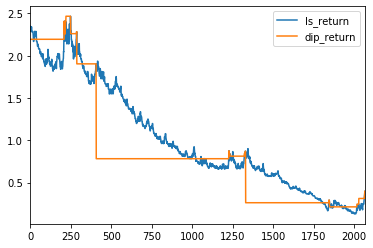

In [363]:
voo_three[['ls_return', 'dip_return']].plot()

Let's get the average of 'ls_return' and the average of 'dip_return'.

In [364]:
avg_ls_return = round(voo_five['ls_return'].mean(), 2)
avg_dip_return = round(voo_five['dip_return'].mean(), 2)

print(f'''Average return of buying now: {avg_ls_return}
Average return when waiting to buy the dip: {avg_dip_return}''')

Average return of buying now: 1.01
Average return when waiting to buy the dip: 0.86


We can get the individual return difference of buying now vs buying the dip, as well as the average of their differences.
(Again, it's the same as avg_ls_return minus avg_dip_return.)

In [365]:
voo_five['ls_vs_dip_return'] = voo_five['ls_return'] - voo_five['dip_return']
avg_ls_vs_dip = round((voo_five['ls_vs_dip_return'].mean()),2)

print(f'''The average difference between lump sum return and buy-the-dip return: {avg_ls_vs_dip}
This shows that buying now, on average, will yield {avg_ls_vs_dip*100:.1f}% more profit than buying the dip.''')

The average difference between lump sum return and buy-the-dip return: 0.15
This shows that buying now, on average, will yield 15.0% more profit than buying the dip.


Okay, when the dip is 5% less than the average closing price of the past month, in this 10-year time series, there's a wooping 15% difference between the two approaches (buying now, with 1.01 average return rate, is a lot more profitable than buying the dip, with 0.86 average return rate).

(Not shown in this: when the dip is 3% less than the average closing price of the past month, in this 10-year time series, there's 2% difference in buying now versus buying the dip, similar to when the dip is 2%.)

# (WIP) Conclusion

Through this study, I learned that the bigger dip I wait for, i.e. the longer I wait to start investing, the more I lose in the long run (because the market is generally on a growing trend). It is important to acknowledge that this is an extremely simplified interpretation of a phenomenon that I do not have the capabilities to fully take into account all its compounding variables. This was an enough exercise for me to see for myself that my initial instinct to wait to buy a stock when the price drops could actually be more detrimental than beneficial, especially if I felt stingy and kept on waiting just a little more. Sometimes, the best time to buy is now (and hold).


###Moving forward, I'd like to run a few more scenario variations as following:

## Scenario 3: Savings Account
Finally, let's see how much profit the original asset would have made if it were put into a savings account with interest rate of 2%.

## Variations:
V1. Sell one year after buying, stop investing.

V2. Sell three years after buying, stop investing.

V3. Sell five years after buying, stop investing.

V4. Repeat each of the above variations but continue to buy more shares as I go on.
